<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/13.%20Week%2013/Notebook/IMBDsentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

# Set seed agar hasil eksperimen dapat direproduksi
SEED = 123
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Jumlah kata tertinggi (vocabulary size) yang akan dipertimbangkan
vocab_size = 10000

# Load dataset IMDB
# num_words -> kita hanya akan mengambil 10.000 kata yang paling sering muncul
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Jumlah data train   : {len(x_train)}")
print(f"Jumlah data test    : {len(x_test)}")

# Contoh data
print("Contoh sequence (x_train[0]):", x_train[0][:20])
print("Label (y_train[0]):", y_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Jumlah data train   : 25000
Jumlah data test    : 25000
Contoh sequence (x_train[0]): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
Label (y_train[0]): 1


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 200  # Panjang sequence yang kita inginkan

# Menambahkan padding pada sequence yang lebih pendek dari maxlen
x_train_padded = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=maxlen, padding='post')

print("Panjang sequence setelah padding:", len(x_train_padded[0]))
print("Contoh sequence setelah padding:", x_train_padded[0])

Panjang sequence setelah padding: 200
Contoh sequence setelah padding: [   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 

In [4]:
embed_dim = 128  # Dimensi embedding

In [5]:
def create_rnn_model(vocab_size, embed_dim, maxlen):
    model = keras.Sequential([
        layers.Embedding(input_dim=vocab_size,
                         output_dim=embed_dim,
                         input_length=maxlen),
        # Layer SimpleRNN pertama dengan Dropout
        layers.SimpleRNN(128,
                         return_sequences=True,
                         dropout=0.1,
                         recurrent_dropout=0.1),
        layers.Dropout(0.2),

        # Layer SimpleRNN kedua
        layers.SimpleRNN(64,
                         return_sequences=False,
                         dropout=0.1,
                         recurrent_dropout=0.1),
        layers.Dropout(0.2),

        # Batch Normalization
        layers.BatchNormalization(),

        # Dense Layer dengan Aktivasi ReLU
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.2),

        # Layer Output
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

rnn_model = create_rnn_model(vocab_size, embed_dim, maxlen)
rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
def create_lstm_model(vocab_size, embed_dim, maxlen):
    model = keras.Sequential([
        layers.Embedding(input_dim=vocab_size,
                         output_dim=embed_dim,
                         input_length=maxlen),
        # Layer SimpleRNN pertama dengan Dropout
        layers.LSTM(128,
                         return_sequences=True,
                         dropout=0.1,
                         recurrent_dropout=0.1),
        layers.Dropout(0.2),

        # Layer SimpleRNN kedua
        layers.LSTM(64,
                         return_sequences=False,
                         dropout=0.1,
                         recurrent_dropout=0.1),
        layers.Dropout(0.2),

        # Batch Normalization
        layers.BatchNormalization(),

        # Dense Layer dengan Aktivasi ReLU
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.2),

        # Layer Output
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

lstm_model = create_lstm_model(vocab_size, embed_dim, maxlen)
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
def create_gru_model(vocab_size, embed_dim, maxlen):
    model = keras.Sequential([
        layers.Embedding(input_dim=vocab_size,
                         output_dim=embed_dim,
                         input_length=maxlen),
        # Layer SimpleRNN pertama dengan Dropout
        layers.GRU(128,
                         return_sequences=True,
                         dropout=0.1,
                         recurrent_dropout=0.1),
        layers.Dropout(0.2),

        # Layer SimpleRNN kedua
        layers.GRU(64,
                         return_sequences=False,
                         dropout=0.1,
                         recurrent_dropout=0.1),
        layers.Dropout(0.2),

        # Batch Normalization
        layers.BatchNormalization(),

        # Dense Layer dengan Aktivasi ReLU
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.2),

        # Layer Output
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

gru_model = create_gru_model(vocab_size, embed_dim, maxlen)
gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
import tensorflow as tf

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,          # Stop training if no improvement for 5 epochs
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model_{model_type}.keras',  # Save best model for each architecture
        monitor='val_loss',
        save_best_only=True
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir='./logs',    # Log directory for TensorBoard
        histogram_freq=1     # Log histogram data every epoch
    )
]

# Define epochs and batch size
epochs = 30
batch_size = 32

# ---------------- RNN -----------------
print("===== Training RNN Model =====")
history_rnn = rnn_model.fit(
    x_train_padded,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('best_rnn_model.keras', save_best_only=True),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir='./logs/rnn')
    ]
)

print("Evaluasi RNN Model pada test set:")
loss_rnn, acc_rnn = rnn_model.evaluate(x_test_padded, y_test, verbose=0)
print(f"Test Loss: {loss_rnn:.4f}")
print(f"Test Accuracy: {acc_rnn:.4f}\n")

# ---------------- LSTM ----------------
print("===== Training LSTM Model =====")
history_lstm = lstm_model.fit(
    x_train_padded,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('best_lstm_model.keras', save_best_only=True),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir='./logs/lstm')
    ]
)

print("Evaluasi LSTM Model pada test set:")
loss_lstm, acc_lstm = lstm_model.evaluate(x_test_padded, y_test, verbose=0)
print(f"Test Loss: {loss_lstm:.4f}")
print(f"Test Accuracy: {acc_lstm:.4f}\n")

# ---------------- GRU -----------------
print("===== Training GRU Model =====")
history_gru = gru_model.fit(
    x_train_padded,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('best_gru_model.keras', save_best_only=True),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir='./logs/gru')
    ]
)

print("Evaluasi GRU Model pada test set:")
loss_gru, acc_gru = gru_model.evaluate(x_test_padded, y_test, verbose=0)
print(f"Test Loss: {loss_gru:.4f}")
print(f"Test Accuracy: {acc_gru:.4f}\n")


===== Training RNN Model =====
Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 163ms/step - accuracy: 0.5046 - loss: 0.7972 - val_accuracy: 0.4976 - val_loss: 0.7384
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 162ms/step - accuracy: 0.4958 - loss: 0.7400 - val_accuracy: 0.5034 - val_loss: 0.7257
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 163ms/step - accuracy: 0.4958 - loss: 0.7234 - val_accuracy: 0.5030 - val_loss: 0.7135
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 163ms/step - accuracy: 0.5002 - loss: 0.7111 - val_accuracy: 0.5038 - val_loss: 0.7064
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 162ms/step - accuracy: 0.4975 - loss: 0.7049 - val_accuracy: 0.5088 - val_loss: 0.7014
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 166ms/step - accuracy: 0.4954 - loss: 0.7005 - val_accuracy: 0.5066 - val_loss: 0.6968
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 163ms/step - accuracy: 0.4976 - loss: 0.6968 - val_accuracy: 0.5022 - val_loss: 0.6954
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 

In [11]:
print("==== Perbandingan Akurasi di Test Set ====")
print(f"RNN  : {acc_rnn:.4f}")
print(f"LSTM : {acc_lstm:.4f}")
print(f"GRU  : {acc_gru:.4f}")

==== Perbandingan Akurasi di Test Set ====
RNN  : 0.5139
LSTM : 0.8622
GRU  : 0.5000


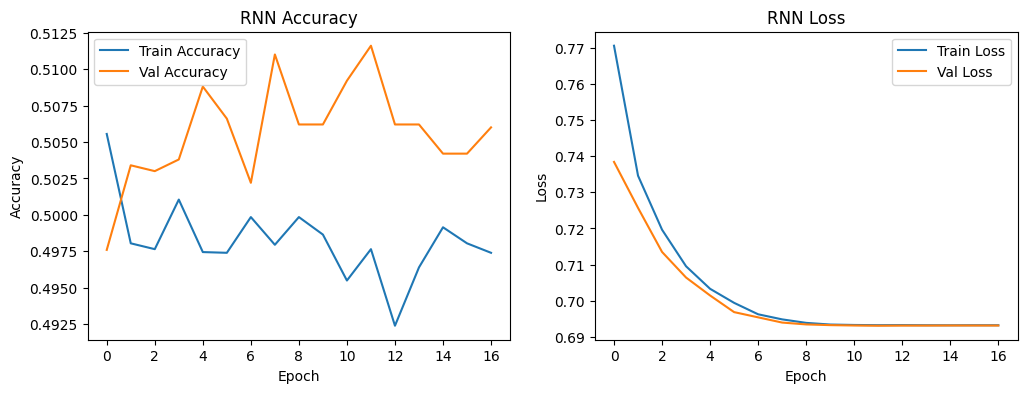

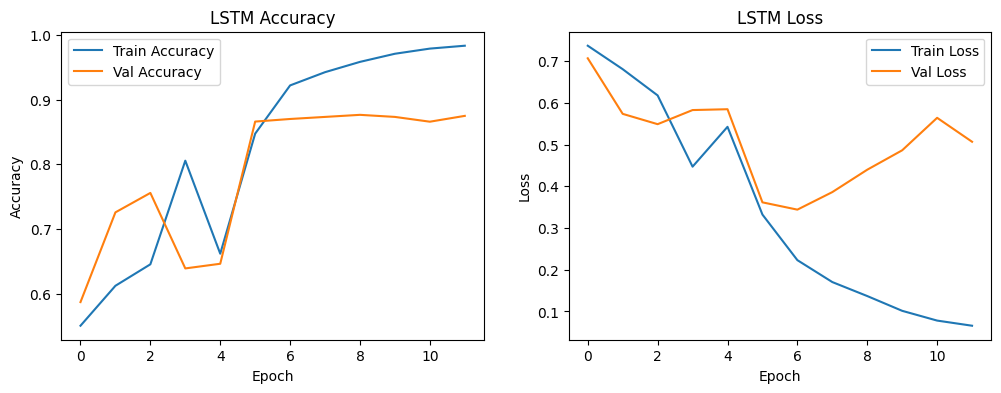

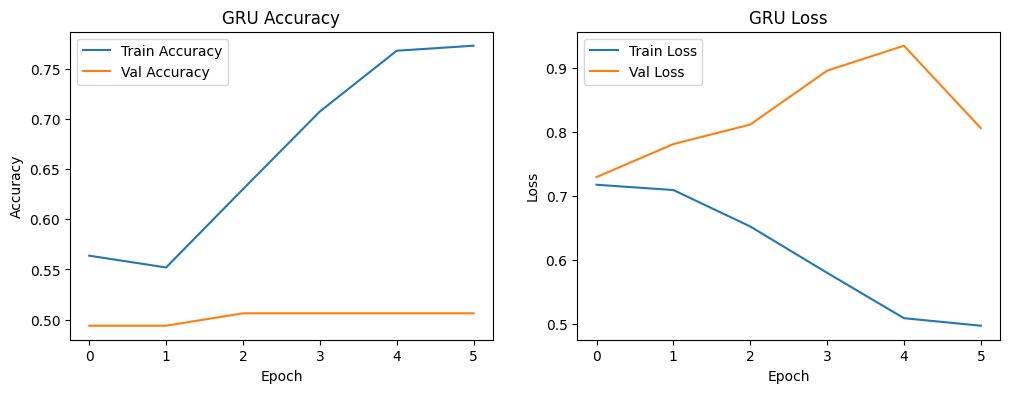

In [12]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot setiap history
plot_history(history_rnn, "RNN")
plot_history(history_lstm, "LSTM")
plot_history(history_gru, "GRU")